<a href="https://colab.research.google.com/github/R2D2oid/Adhoc-Visualizations/blob/main/KD_Results_Extended_Archs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install wandb
import pandas as pd 
import wandb
import numpy as np
from matplotlib import pyplot as plt
api = wandb.Api()


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
! pip install wandb

     |████████████████████████████████| 1.8 MB 4.3 MB/s 
     |████████████████████████████████| 145 kB 45.1 MB/s 
     |████████████████████████████████| 181 kB 35.3 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=3bb52d438dd85eeafd910d6660ed81d7ffa48f83e22968d572effe92e64d300c
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [ ]:

# Project is specified by <entity/project-name>
runs = api.runs("colab_distillation/KD_size_gap")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

runs_df.to_csv("project.csv")

In [ ]:
# Acc/Train_Student
# Acc/Train_Teacher
# Acc/Val_Student
# Acc/Val_Teacher
# CE_Loss/Train_Student
# CE_Loss/Train_Teacher
# CE_Loss/Val_Student
# CE_Loss/Val_Teacher
# KD_total_Loss/Train_Student
# KD_total_Loss/Train_Teacher
# KD_total_Loss/Val_Student
# KD_total_Loss/Val_Teacher
# KL_Loss/Train_Student
# KL_Loss/Train_Teacher
# KL_Loss/Val_Student
# KL_Loss/Val_Teacher
# LR/lr_Student
# LR/lr_Teacher
# _runtime
# _step
# _timestamp
# _wandb
# graph_0

# run_results = []
# for i in runs[0].summary.keys():
#   if i[0:4] not in ['grad', 'para']:
#     run_results.append(i)

# for i in (sorted(run_results)):
#   print(i)

In [ ]:
# runs[0]

In [ ]:
results = []

columns = ['exp_name', 'acc_val_student', 'acc_val_teacher', 'alpha_kd', 'dataset', 'epochs', 'lr_stud', 'student_model', 'teacher_model', 'username']
for run in runs: 
    exp_name = run.name
    summary = run.summary._json_dict
    if '_timestamp' in summary.keys() and summary['_timestamp'] > 1651845789: # runs after 2022-05-06
  
      config=({k: v for k,v in run.config.items() if not k.startswith('_')})
      acc_val_student = summary['Acc/Val_Student']['max']
      acc_val_teacher = summary['Acc/Val_Teacher']['max']

      info = []
      kk = ['alphakd', 'dataset', 'epochs', 'lr_stud', 'student_model', 'teacher_model', 'slurmfile']
      for k in kk:      
        if k in config.keys():
          if k == 'slurmfile':
            username = config['slurmfile'].split('/')[2]
          else:
            info.append(config[k])
        else:
          print(k)
          info.append('')

      info.extend([username])
      row = [exp_name, acc_val_student, acc_val_teacher]
      row.extend(info)

      results.append(row)


In [ ]:
columns = ['exp_name', 'acc_val_student', 'acc_val_teacher', 'alphakd', 'dataset', 'epochs', 'lr_stud', 'student_model', 'teacher_model', 'username']
df_main = pd.DataFrame(results, columns=columns)

In [ ]:
# df_cifar100 = df_main[df_main['student_model'].str.contains('plain')][df_main['dataset']=='cifar100']
# df_cifar100 = df_cifar100[df_cifar100['alphakd']==0.3]
# df_cifar100['s_model']= pd.to_numeric(df_cifar100['student_model'].str[5:])
# df_cifar100['t_model']= pd.to_numeric(df_cifar100['teacher_model'].str[5:])

In [ ]:
df_cifar10 = df_main[df_main['student_model'].str.contains('plain')][df_main['dataset']=='cifar10']
df_cifar10 = df_cifar10[df_cifar10['alphakd']==0.3]
df_cifar10['s_model']= pd.to_numeric(df_cifar10['student_model'].str[5:])
df_cifar10['t_model']= pd.to_numeric(df_cifar10['teacher_model'].str[5:])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
# df_cifar10.where(df_cifar10.s_model<12).sort_values(['s_model', 't_model']).groupby(['s_model','t_model']).tail(1)
# df_cifar10.sort_values(['s_model', 't_model']).groupby(['s_model','t_model']).tail(1)

# CIFAR10

In [ ]:
cifar10_data = df_cifar10.sort_values(['s_model', 't_model']).groupby(['s_model','t_model']).tail(1)[['s_model', 't_model','acc_val_student','acc_val_teacher']].values.tolist()

In [ ]:
dd = {}
for s,t,s_acc,t_acc in cifar10_data:
  dd[f'{int(s)}_{int(t)}']=[s_acc,t_acc]

model_sizes = range(2,22,2)
for s in model_sizes:
  for t in model_sizes:
    if not (f'{s}_{t}' in dd.keys()):
      dd[f'{s}_{t}'] = [dd[f'{t}_{s}'][1],dd[f'{t}_{s}'][0]]

In [ ]:
rows = []
for k,v in dd.items():
  row = []
  s,t = k.split('_')
  row = [int(s),int(t)]
  row.extend(v)
  rows.append(row)

In [ ]:
columns = ['s', 't', 's_acc', 't_acc']
df = pd.DataFrame(rows, columns=columns)
df = df.sort_values(by=['s', 't'])

In [ ]:
# df.sort_values(by=['s','t'])

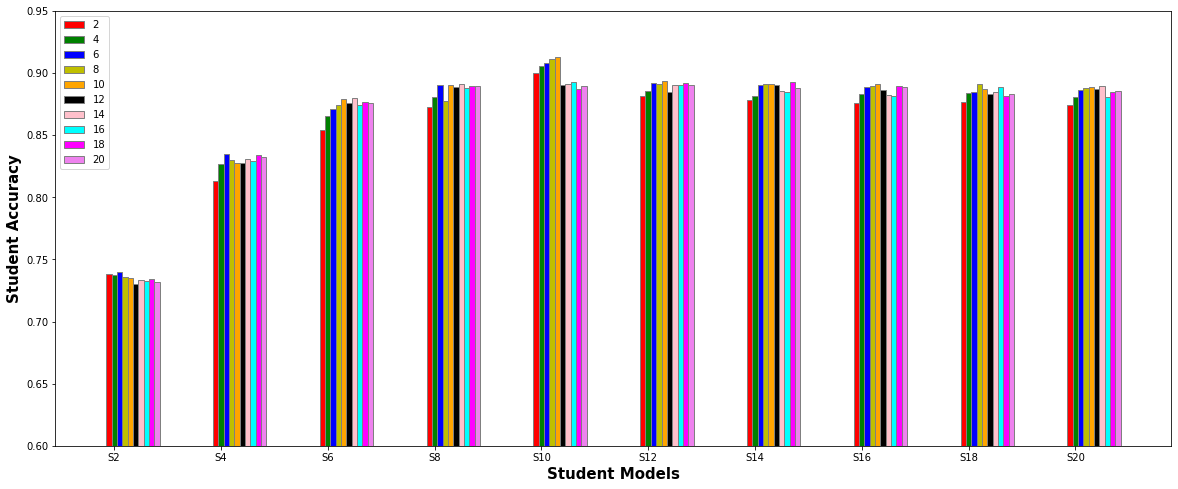

In [ ]:
barWidth = 0.05
fig = plt.subplots(figsize =(20, 8))

br_init = np.arange(len(df[df.t==2].s_acc)+5) 
i = 0
model_sizes = [i for i in range(2,22,2)]
clr = ['r', 'g', 'b', 'y', 'orange', 'black', 'pink', 'cyan', 'magenta', 'violet']
for t in model_sizes:
  a = df[df.t==t].s_acc
  if i==0:
    br = np.arange(len(a))
  else:
    br = [x + barWidth for x in br]

  plt.bar(br, a, color =clr[i], width = barWidth, edgecolor ='grey', label=t)
  i+=1

 
# Adding Xticks
plt.xlabel('Student Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Student Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(a))], [f'S{i}' for i in model_sizes])

plt.ylim([0.6,0.95])
 
plt.legend()
plt.show()

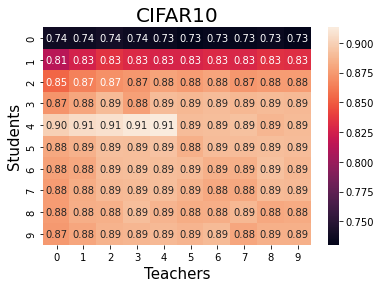

In [ ]:
import seaborn as sns

rows = []
for s in range(2,22,2):
  s_accs = df[df.s==s].s_acc.values.tolist()
  rows.append(s_accs)


ax = sns.heatmap(rows, annot = True, fmt = '.2f')

plt.title('CIFAR10', fontsize = 20) # title with fontsize 20
plt.xlabel('Teachers', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Students', fontsize = 15) # y-axis label with fontsize 15

plt.show()

# CIFAR-100

In [ ]:
import matplotlib
import random
import copy
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default

creds, _ = default()

gc = gspread.authorize(creds)
worksheet = gc.open('CIFAR100_Results_ExtendedArchs').sheet1 # CIFAR10_CNN
rows = worksheet.get_all_values()


df_cifar100 = pd.DataFrame.from_records(rows)

new_header = df_cifar100.iloc[0]
df_cifar100 = df_cifar100[1:]
df_cifar100.columns = new_header

df_cifar100['s_model']= pd.to_numeric(df_cifar100['s_model'].str[5:])
df_cifar100['t_model']= pd.to_numeric(df_cifar100['t_model'].str[5:])


In [ ]:
df_cifar100.sort_values(by=['s_model', 't_model'])

,s_model,s_acc,t_model,t_acc,last_epoch
60,2,0.525,2,0.525,150
58,2,0.5384,4,0.6185,150
57,2,0.5343,6,0.664,150
56,2,0.5293,8,0.6577,150
45,2,0.5325,10,0.6506,150
...,...,...,...,...,...
4,16,0.6694,18,0.6595,150
3,16,0.6654,20,0.6571,150
2,18,0.6475,18,0.6475,150
1,18,0.6641,20,0.6609,149


In [ ]:
cifar100_data = df_cifar100.sort_values(['s_model', 't_model']).groupby(['s_model','t_model']).tail(1)[['s_model', 't_model','s_acc','t_acc']].values.tolist()

In [ ]:
dd = {}
for s,t,s_acc,t_acc in cifar100_data:
  dd[f'{int(s)}_{int(t)}']=[s_acc,t_acc]

model_sizes = range(2,22,2)
for s in model_sizes:
  for t in model_sizes:
    if not (f'{s}_{t}' in dd.keys()):
      dd[f'{s}_{t}'] = [dd[f'{t}_{s}'][1],dd[f'{t}_{s}'][0]]

rows = []
for k,v in dd.items():
  row = []
  s,t = k.split('_')
  row = [int(s),int(t)]
  row.extend(v)
  rows.append(row)


columns = ['s', 't', 's_acc', 't_acc']
df = pd.DataFrame(rows, columns=columns)
df = df.sort_values(by=['s', 't'])

In [ ]:
df['s_acc'] = df['s_acc'].astype(float)
df['t_acc'] = df['t_acc'].astype(float) 

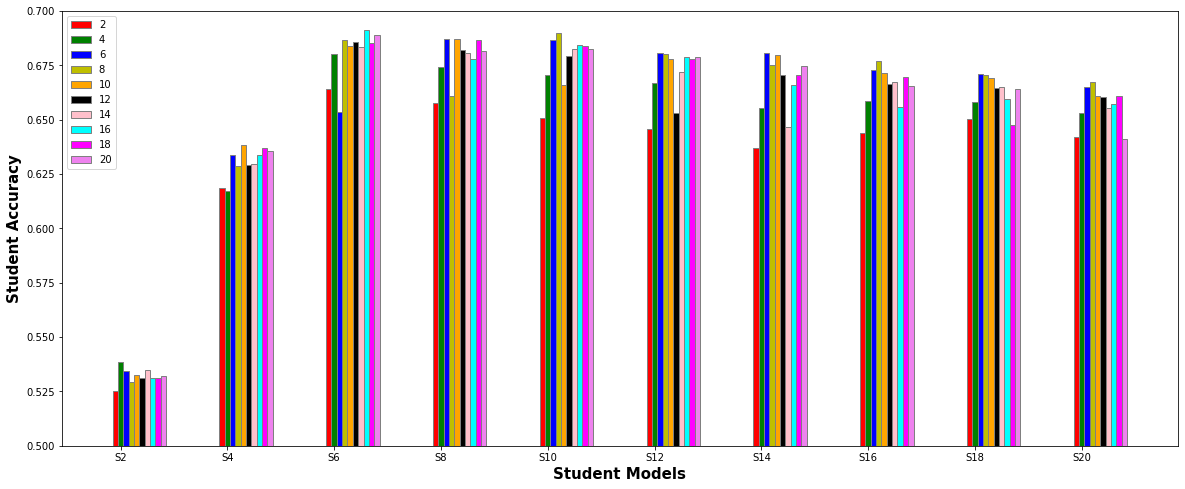

In [ ]:
barWidth = 0.05
fig = plt.subplots(figsize =(20, 8))

br_init = np.arange(len(df[df.t==2].s_acc)+5) 
i = 0
model_sizes = [i for i in range(2,22,2)]
clr = ['r', 'g', 'b', 'y', 'orange', 'black', 'pink', 'cyan', 'magenta', 'violet']
for t in model_sizes:
  a = df[df.t==t].s_acc
  if i==0:
    br = np.arange(len(a))
  else:
    br = [x + barWidth for x in br]

  plt.bar(br, a, color =clr[i], width = barWidth, edgecolor ='grey', label=t)
  i+=1

 
# Adding Xticks
plt.xlabel('Student Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Student Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(a))], [f'S{i}' for i in model_sizes])

plt.ylim([0.5,0.7])
 
plt.legend()
plt.show()

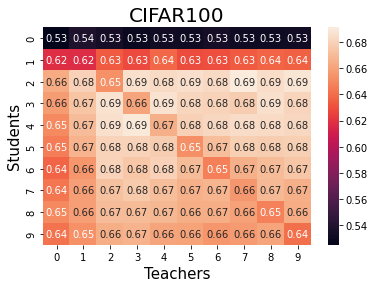

In [ ]:
import seaborn as sns

rows = []
for s in range(2,22,2):
  s_accs = df[df.s==s].s_acc.values.tolist()
  rows.append(s_accs)
  
ax = sns.heatmap(rows, annot = True, fmt = '.2f')

plt.title('CIFAR100', fontsize = 20) # title with fontsize 20
plt.xlabel('Teachers', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Students', fontsize = 15) # y-axis label with fontsize 15

plt.show()

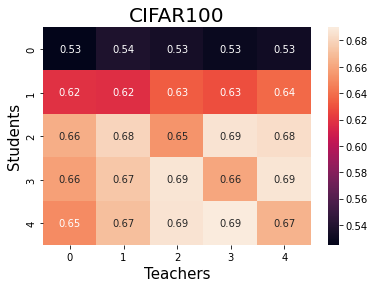

In [ ]:
import seaborn as sns

rows = []
for s in range(2,12,2):
  s_accs = df[df.s==s].s_acc.values.tolist()[:5]
  rows.append(s_accs)
  
ax = sns.heatmap(rows, annot = True, fmt = '.2f')

plt.title('CIFAR100', fontsize = 20) # title with fontsize 20
plt.xlabel('Teachers', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Students', fontsize = 15) # y-axis label with fontsize 15

plt.show()

#Action Items:

## Tagging experiments and debugging the jump
## update architectures where conv layers are added earlier on in the network
## run cifar10 and cifar100 without KD
## commit this colab and archs to github
